In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd

In [73]:
labels = pd.read_csv('/content/drive/My Drive/CelebA/Anno/labels_even_clean.csv', header=0, names=['Filename', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Smiling'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_labels is your labels dataframe
# Sum the values in the specified columns
sums = labels[['High_Cheekbones', 'Mouth_Slightly_Open', 'Smiling']].sum()

# Plot the sums using a bar graph
plt.bar(sums.index, sums.values, color=['skyblue', 'orange', 'lightgreen'])
plt.xlabel('Attributes')
plt.ylabel('Sum')
plt.title('Class Densities')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_labels is your labels dataframe
# Sum the values in the specified columns
sums = labels[['High_Cheekbones', 'Mouth_Slightly_Open', 'Smiling']].sum()

# Plot the sums using a bar graph
plt.bar(sums.index, sums.values, color=['skyblue', 'orange', 'lightgreen'])

# Add a line and label at the top of each bar with the exact sum
for index, value in enumerate(sums):
    plt.text(index, value + 0.05, str(value), ha='center')

plt.xlabel('Attributes')
plt.ylabel('Sum')
plt.title('Class Densities')
plt.show()


In [91]:
df1 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8E_fine_tuned_uncropped.csv')
df2 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8+2E_fine_tuned_uncropped.csv')
df3 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8+3E_fine_tuned_uncropped.csv')
df4 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8+3+5E_fine_tuned_uncropped.csv')

df5 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8E_fine_tuned_cropped.csv')
df6 = pd.read_csv('/content/drive/My Drive/CelebA/Saved_models/VGG16_Transfer_3_Classes_Square/metrics/8+8E_fine_tuned_cropped.csv')

In [92]:
df_uncropped = pd.concat([df1, df2, df3, df4])

In [99]:
df_cropped = pd.concat([df1, df2])

In [100]:
df_uncropped.reset_index(drop=True, inplace=True)
df_cropped.reste_index(drop=True, inplace=True)

df.insert(loc=0, column='epoch', value=df.index)

In [101]:
# prompt: create a new column 'epoch' at the first position and number it by the index

df.insert(loc=0, column='epoch', value=df.index)


In [102]:
# prompt: #Re-number epoch to start at 1

df['epoch'] = df['epoch'] + 1

In [31]:
df.drop(df.tail(1).index,inplace=True)

In [22]:
# prompt: save df to '/content/drive/My Drive/CelebA/Saved_models/Custom_Convo_Model_3_Classes_v5/metrics' as '14882243_16E'

df.to_csv('/content/drive/My Drive/CelebA/Saved_models/Custom_Convo_Model_3_Classes_v5/metrics/14882243_16E_cropped.csv', index=False)


In [96]:
df_uncropped = df

In [103]:
df_cropped = df

In [ ]:
df_uncropped

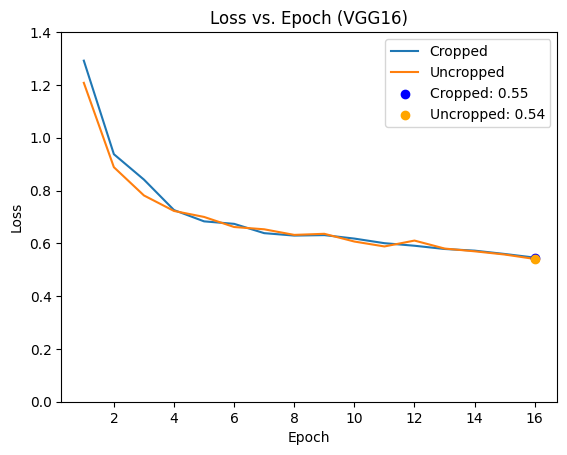

In [106]:
plt.plot(df_cropped['epoch'], df_cropped['loss'], label='Cropped')
plt.plot(df_uncropped['epoch'], df_uncropped['loss'], label='Uncropped')

# Add a point at the end of each line with a label for its y value
plt.scatter(df_cropped['epoch'].iloc[-1], df_cropped['loss'].iloc[-1], color='blue', label=f"Cropped: {df_cropped['loss'].iloc[-1]:.2f}", zorder=5)
plt.scatter(df_uncropped['epoch'].iloc[-1], df_uncropped['loss'].iloc[-1], color='orange', label=f"Uncropped: {df_uncropped['loss'].iloc[-1]:.2f}", zorder=5)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch (VGG16)')
plt.legend()
plt.ylim(0, 1.4)
plt.show()


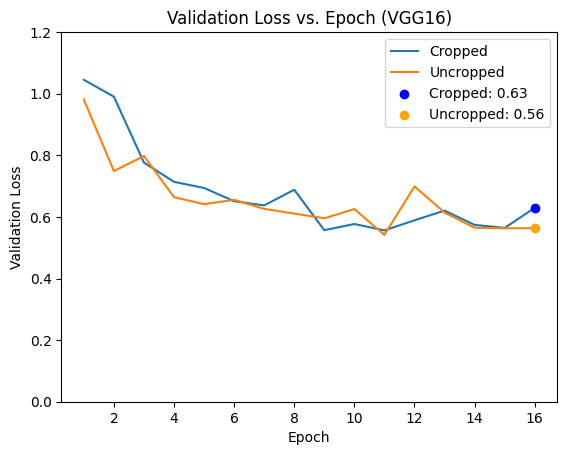

In [108]:
plt.plot(df_cropped['epoch'], df_cropped['val_loss'], label='Cropped')
plt.plot(df_uncropped['epoch'], df_uncropped['val_loss'], label='Uncropped')

# Add a point at the end of each line with a label for its y value
plt.scatter(df_cropped['epoch'].iloc[-1], df_cropped['val_loss'].iloc[-1], color='blue', label=f"Cropped: {df_cropped['val_loss'].iloc[-1]:.2f}", zorder=5)
plt.scatter(df_uncropped['epoch'].iloc[-1], df_uncropped['val_loss'].iloc[-1], color='orange', label=f"Uncropped: {df_uncropped['val_loss'].iloc[-1]:.2f}", zorder=5)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epoch (VGG16)')
plt.legend()
plt.ylim(0, 1.2)  # You can adjust the y-axis limits according to your data
plt.show()


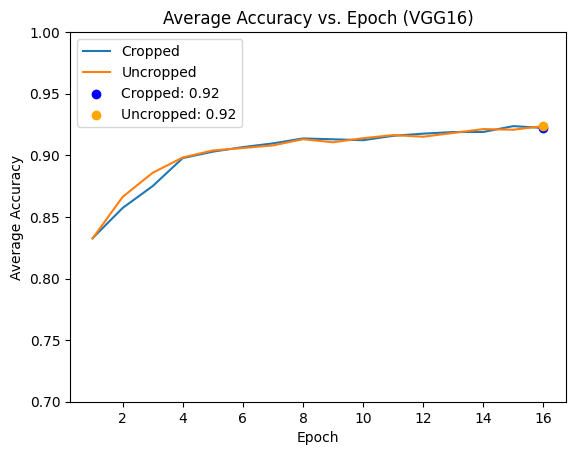

In [109]:
# Calculate the average accuracy for cropped and uncropped data
df_cropped['average_accuracy'] = df_cropped[['High_Cheekbones_accuracy', 'Mouth_Slightly_Open_accuracy', 'Smiling_accuracy']].mean(axis=1)
df_uncropped['average_accuracy'] = df_uncropped[['High_Cheekbones_accuracy', 'Mouth_Slightly_Open_accuracy', 'Smiling_accuracy']].mean(axis=1)

# Plot the average accuracy
plt.plot(df_cropped['epoch'], df_cropped['average_accuracy'], label='Cropped')
plt.plot(df_uncropped['epoch'], df_uncropped['average_accuracy'], label='Uncropped')

# Add a point at the end of each line with a label for its y value
plt.scatter(df_cropped['epoch'].iloc[-1], df_cropped['average_accuracy'].iloc[-1], color='blue', label=f"Cropped: {df_cropped['average_accuracy'].iloc[-1]:.2f}", zorder=5)
plt.scatter(df_uncropped['epoch'].iloc[-1], df_uncropped['average_accuracy'].iloc[-1], color='orange', label=f"Uncropped: {df_uncropped['average_accuracy'].iloc[-1]:.2f}", zorder=5)

plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Epoch (VGG16)')
plt.legend()
# You can adjust the y-axis limits according to your data
plt.ylim(.7, 1)
plt.show()


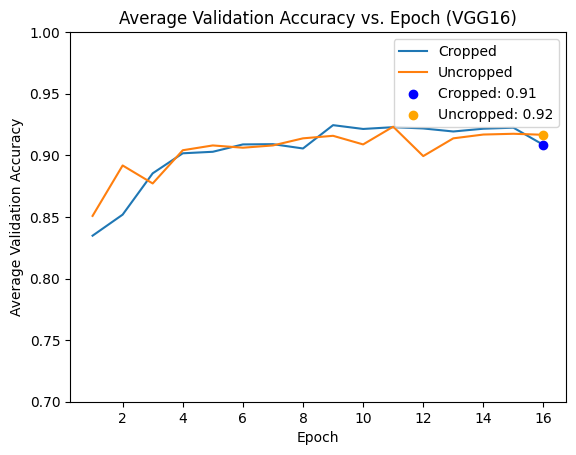

In [110]:
# Calculate the average validation accuracy for cropped and uncropped data
df_cropped['average_val_accuracy'] = df_cropped[['val_High_Cheekbones_accuracy', 'val_Mouth_Slightly_Open_accuracy', 'val_Smiling_accuracy']].mean(axis=1)
df_uncropped['average_val_accuracy'] = df_uncropped[['val_High_Cheekbones_accuracy', 'val_Mouth_Slightly_Open_accuracy', 'val_Smiling_accuracy']].mean(axis=1)

# Plot the average validation accuracy
plt.plot(df_cropped['epoch'], df_cropped['average_val_accuracy'], label='Cropped')
plt.plot(df_uncropped['epoch'], df_uncropped['average_val_accuracy'], label='Uncropped')

# Add a point at the end of each line with a label for its y value
plt.scatter(df_cropped['epoch'].iloc[-1], df_cropped['average_val_accuracy'].iloc[-1], color='blue', label=f"Cropped: {df_cropped['average_val_accuracy'].iloc[-1]:.2f}", zorder=5)
plt.scatter(df_uncropped['epoch'].iloc[-1], df_uncropped['average_val_accuracy'].iloc[-1], color='orange', label=f"Uncropped: {df_uncropped['average_val_accuracy'].iloc[-1]:.2f}", zorder=5)

plt.xlabel('Epoch')
plt.ylabel('Average Validation Accuracy')
plt.title('Average Validation Accuracy vs. Epoch (VGG16)')
plt.legend()
# You can adjust the y-axis limits according to your data
plt.ylim(.7, 1)
plt.show()
